# 02-批量汇总、过滤与组合


In [1]:
from __future__ import annotations

from pathlib import Path
from molop.io import AutoParser


def find_repo_root(start: Path) -> Path:
    current = start.resolve()
    for candidate in (current, *current.parents):
        if (candidate / "pyproject.toml").exists():
            return candidate
    raise RuntimeError("Could not find repository root (pyproject.toml).")


repo_root = find_repo_root(Path.cwd())

## 批量汇总


In [2]:
mix_batch = AutoParser((repo_root / "tests/test_files/mix_format/*").as_posix())
mix_batch

MolOP parsing with single process:   0%|          | 0/10 [00:00<?, ?it/s]

FileBatchModelDisk(10)

In [33]:
mix_batch.to_summary_df()

MolOP processing frame summary with 1 jobs:   0%|          | 0/10 [00:00<?, ?it/s]

DiskStorage            General  \
                                            FilePath FileFormat  Charge   
0  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log      -1   
1  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .gjf       0   
2  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .gjf       0   
3  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       0   
4  /Users/tmj/Documents/proj/MolOP/tests/test_fil...      .fchk       0   
5  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .gjf       0   
6  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .log       1   
7  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .gjf       0   
8  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .out       0   
9  /Users/tmj/Documents/proj/MolOP/tests/test_fil...       .gjf       0   

                                                                            \
  Multiplicity                                    CanonicalSMILES NumAtoms   
0            1  C/C=C(\[O-])[N-](c1ccccc1)->[Cu+3]1(<-[O-]c2cc...       77   
1            1                                CCOC(=O)c1cc(OC)no1       21   
2            1  C=[N+](C)[N-]C.COC(=O)[C@@]1(OC)C#CC(Br)(Br)CCCC1       43   
3            1  C=[N+](C)[N-]C.COC(=O)[C@@]1(OC)C#CC(Br)(Br)CCCC1       43   
4            2                                             [CH2]C        7   
5            2                                             [CH2]C        7   
6            1                       C[N+]1=C=CC([N+](=O)[O-])=C1       14   
7            1                                      C=CCC.CC(=O)O       20   
8            1                                      C=CCC.CC(=O)O       20   
9            1                                                  C        5   

          Calc Parameter                                                     \
  FrameID       Software                                            Version   
0     131       Gaussian                                   ES64L-G16RevC.01   
1       0            NaN                                                NaN   
2       0            NaN                                                NaN   
3      73       Gaussian                                   ES64L-G16RevB.01   
4       0            NaN                                                NaN   
5       0            NaN                                                NaN   
6      21       Gaussian                                   ES64L-G16RevC.01   
7       0            NaN                                                NaN   
8      43       Gaussian  Gaussian 09:  AS64L-G09RevD.01 24-Apr-2013\n  ...   
9       0            NaN                                                NaN   

          ...                \
  Method  ...    Functional   
0    DFT  ...        RB3LYP   
1    NaN  ...           NaN   
2    NaN  ...           NaN   
3    DFT  ...        RB3LYP   
4    NaN  ...           NaN   
5    NaN  ...           NaN   
6    DFT  ...  RB3LYP-GD3BJ   
7    NaN  ...           NaN   
8    DFT  ...                 
9    NaN  ...           NaN   

                                                      Environment          \
                                            Keywords SolventModel Solvent   
0  #N Geom=AllCheck Guess=TCheck SCRF=Check GenCh...         None    None   
1                                                NaN          NaN     NaN   
2                                                NaN          NaN     NaN   
3  #N Geom=AllCheck Guess=TCheck SCRF=Check Test ...          PCM   Water   
4                                                NaN          NaN     NaN   
5                                                NaN          NaN     NaN   
6  #p b3lyp/chkbas pop=nbo geom=allcheck guess=tc...         None    None   
7                                                NaN          NaN     NaN   
8      #P irc=(calcfc, MaxPoints=20) ub3lyp/6-31g(d)         None    None   
9                                 

In [3]:
mix_batch.file_names

['RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log',
 'S_Ph_Ni_TS.gjf',
 'TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.gjf',
 'TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16.log',
 'dsgdb9nsd_000007-6.fchk',
 'dsgdb9nsd_000007-6.gjf',
 'dsgdb9nsd_131941-4+.log',
 'irc.gjf',
 'irc.out',
 'opt_point_charge_xtb.gjf']

可以像列表一样对批次进行索引，获取特定的文件。

In [4]:
mix_batch[0].file_path

'/Users/tmj/Documents/proj/MolOP/tests/test_files/mix_format/RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log'

索引也可以是文件的路径，对于顺序不方便获得的大规模场景会更有用，例如：

In [5]:
mix_batch[mix_batch[0].file_path].file_path

'/Users/tmj/Documents/proj/MolOP/tests/test_files/mix_format/RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt.log'

进行快速观察

MolOP processing smi format with 1 jobs:   0%|          | 0/10 [00:00<?, ?it/s]

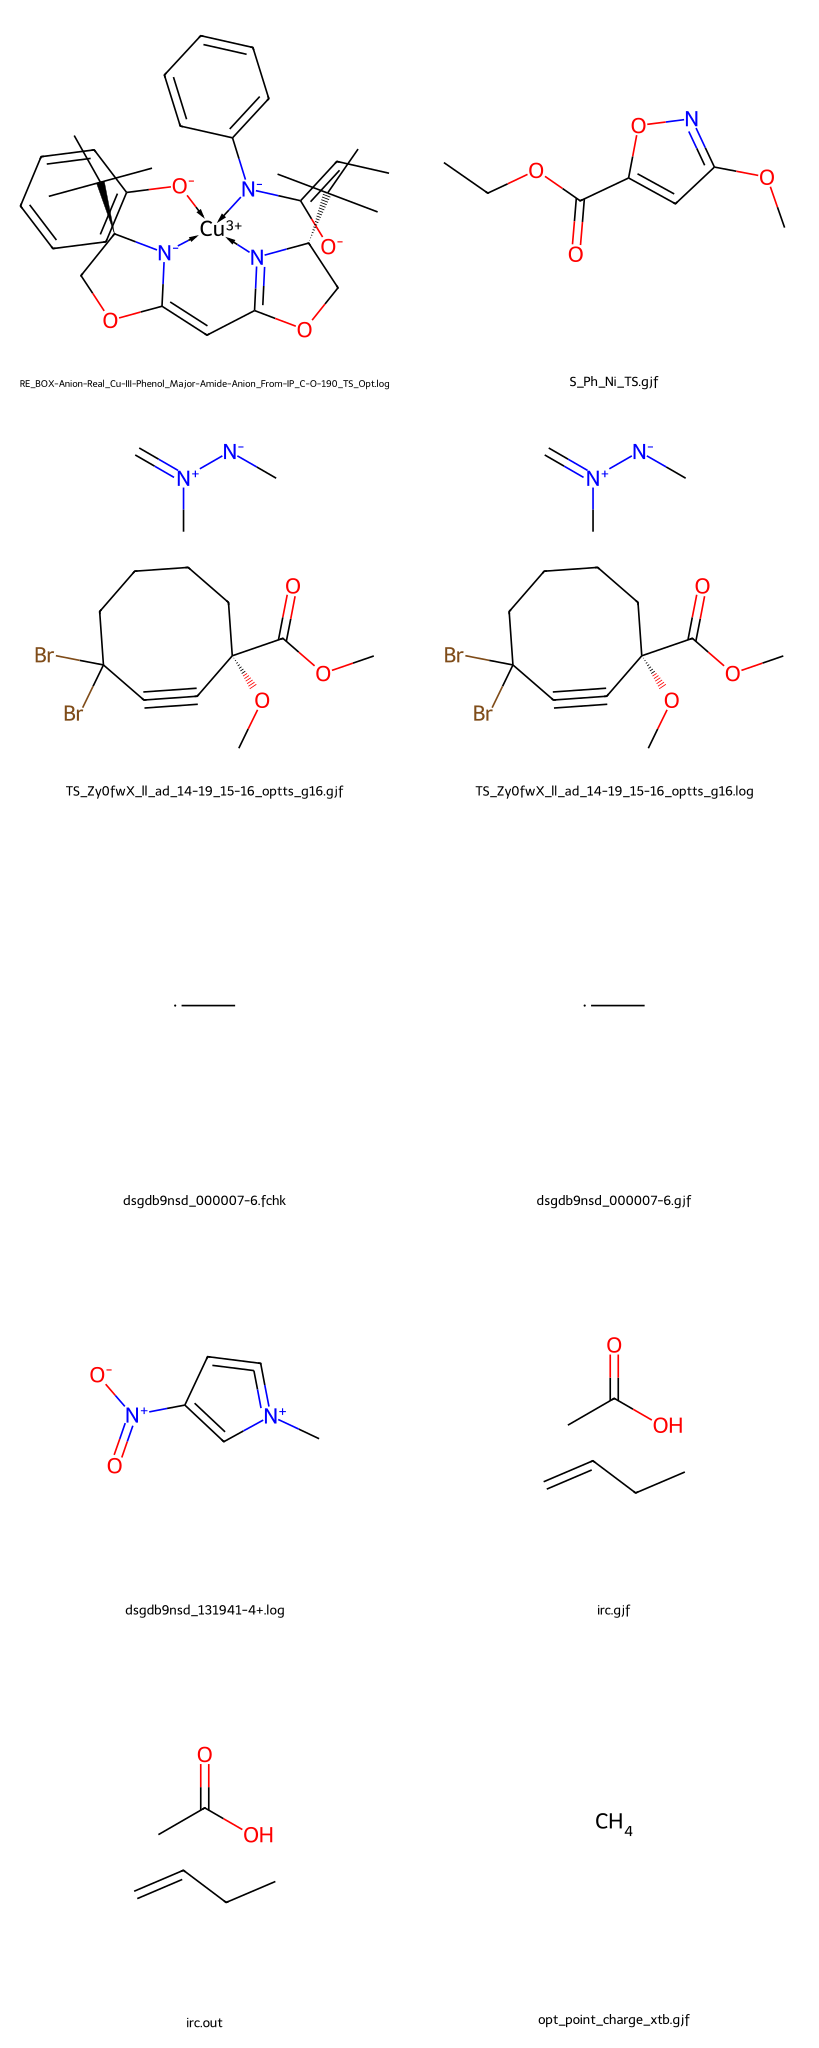

In [6]:
mix_batch.draw_grid_image(molsPerRow=2, subImgSize=(500, 500))

如果计算结果中存在可嵌入到原子或键的信息，可以使用`qm_embedded_rdmol`方法获取嵌入后的rdkit mol对象，从这种对象保存的SDF/MOL文件中会包含这些信息。

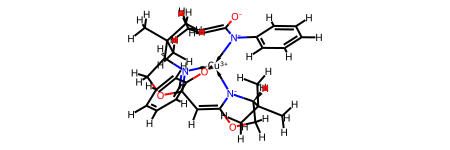

In [7]:
mix_batch[0][-1].qm_embedded_rdmol()

## 过滤文件


在文件数量较多时开启并行处理可以显著提高处理速度。

In [8]:
mix_batch.groupby(lambda x: x.pure_filename)

Grouping files with 1 jobs:   0%|          | 0/10 [00:00<?, ?it/s]

{'RE_BOX-Anion-Real_Cu-III-Phenol_Major-Amide-Anion_From-IP_C-O-190_TS_Opt': FileBatchModelDisk(1),
 'S_Ph_Ni_TS': FileBatchModelDisk(1),
 'TS_Zy0fwX_ll_ad_14-19_15-16_optts_g16': FileBatchModelDisk(2),
 'dsgdb9nsd_000007-6': FileBatchModelDisk(2),
 'dsgdb9nsd_131941-4+': FileBatchModelDisk(1),
 'irc': FileBatchModelDisk(2),
 'opt_point_charge_xtb': FileBatchModelDisk(1)}

In [24]:
mix_batch.groupby(lambda x: x.file_format)

Grouping files with 1 jobs:   0%|          | 0/10 [00:00<?, ?it/s]

{'.log': FileBatchModelDisk(3),
 '.gjf': FileBatchModelDisk(5),
 '.fchk': FileBatchModelDisk(1),
 '.out': FileBatchModelDisk(1)}

In [22]:
ts_batch = mix_batch.filter_state("ts")
ts_batch

Filtering ts files  with 1 jobs:   0%|          | 0/10 [00:00<?, ?it/s]

FileBatchModelDisk(2)

In [25]:
opt_batch = mix_batch.filter_state("opt")
opt_batch

Filtering opt files  with 1 jobs:   0%|          | 0/10 [00:00<?, ?it/s]

FileBatchModelDisk(3)

In [26]:
cation_batch = mix_batch.filter_value("charge", 1)
cation_batch


Filtering files with charge == 1 with 1 jobs:   0%|          | 0/10 [00:00<?, ?it/s]

FileBatchModelDisk(1)

In [27]:
anion_batch = mix_batch.filter_value("charge", 0, "<")
anion_batch


Filtering files with charge < 0 with 1 jobs:   0%|          | 0/10 [00:00<?, ?it/s]

FileBatchModelDisk(1)

内置了并行执行器，用户可以通过 `parallel_execute` 方法并行执行自定义函数，最终返回一个包含所有函数执行结果的列表。

In [28]:
mix_batch.parallel_execute(lambda x: print(x.charge))

  0%|          | 0/10 [00:00<?, ?it/s]

-1
0
0
0
0
0
1
0
0
0


[None, None, None, None, None, None, None, None, None, None]

## 组合

支持简单的布尔运算，例如：

In [29]:
ion_batch = cation_batch + anion_batch
ion_batch

FileBatchModelDisk(2)

In [30]:
opt_batch_without_ts = opt_batch - ts_batch
opt_batch_without_ts

FileBatchModelDisk(1)